In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
#Read datasets
train <- read.csv("bike_rental_train.csv")
test <- read.csv("bike_rental_test.csv")

#Rows and Cols
dim(train)
dim(test)

#Columns name
colnames(train)
colnames(test)

#Show  
head(train)
head(test)

   temp humidity windspeed bike_rent_count
1  9.84       81    0.0000              16
2 17.22       88   16.9979              37
3 16.40       87   16.9979              36
4 18.86       94   12.9980               6
5 18.86       94   12.9980               3
6 14.76       71   16.9979              70


In [3]:
import pandas as pd

train = pd.read_csv("bike_rental_train.csv").dropna()
test = pd.read_csv("bike_rental_test.csv").dropna()

In [ ]:
%%R
# 2. What is RMSE (Root Mean Square of Error) for the ZeroR model (data=test, target=bike_rent_count)?

# value_counts = train['bike_rent_count'].value_counts()
# predictions = value_counts.to_dict()
# # errors = len(train['bike_rent_count']) - predictions
# brc = train['bike_rent_count'].tolist()

# sum = 0
# for count in brc:
#   # predicted = 
#   sum += (5 - count)**2
# sum /= len(brc)
# sum = sum**0.5

# # predictions
# # sum = 0
# # for prediction in predictions:
# #   sum += ((prediction * predictions[prediction]) - (5 * predictions[prediction]))**2

# # print(value_counts)
# print(brc)
# sum
# # sum = sum/(len(predictions)-1)
# # sum**0.5

pred <- mean(train$bike_rent_count)
rmse<-sqrt(mean((pred-test$bike_rent_count)^2))
rmse

[1] 182.0101


[1] "temp is the root node of the decision tree."


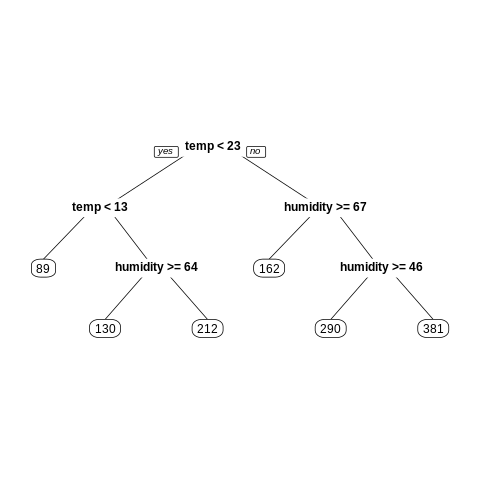

In [ ]:
# 3. What is the best predictor (root node) for the Decision Tree model?
%%R
#---------------
# Decision tree
#---------------
# library(caret)
# install.packages(c("rpart", "rpart.plot", "AUC"))
library(rpart)
library(rpart.plot)	
library(AUC)

#train
model.Dtree <- rpart(bike_rent_count ~., data = train)
prp(model.Dtree)
print("temp is the root node of the decision tree.")

In [ ]:
%%R
# 4. What is RMSE for the Decision Tree model?
predictions <- predict(model.Dtree, newdata=test)
errors <- test$bike_rent_count - predictions 
rmse <- sqrt(mean((errors^2)))
rmse

[1] 155.1006


In [ ]:
%%R
# 6. What is RMSE for the Multiple Regression model?
# 7. What is RMSE for the Multiple Regression model if we only use two predictors (temp and humidity)?
#----------------------------
# Multiple Linear Regression
#----------------------------

#Train
model.MLR <- lm(bike_rent_count ~., data=train)
summary(model.MLR)

#Residual plot
res.MLR = resid(model.MLR)
# plot(train$temp, res.MLR, ylab="Residuals", xlab="Temperature", main="Residual Plot") 
# abline(0, 0)

#Q-Q plot
stdres.MLR = rstandard(model.MLR)
# qqnorm(stdres.MLR, ylab="Standardized Residuals", xlab="Normal Scores", main="QQ Plot") 
# qqline(stdres.MLR)

#Test
predictions <- predict(model.MLR, newdata=test)
errors <- test$bike_rent_count - predictions 
rmse <- sqrt(mean((errors^2)))

#Erros histogram
# hist(errors, main="bike_rent_count", sub="(Actual-Predicted)", xlab="Error", breaks=10, col="darkred")
print(rmse)

[1] 155.967


In [13]:
#8 What is RMSE for the KNN model (K=5, distance = 2, scale=FALSE)?
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, radius=2)

knn.fit(train[['temp', 'windspeed', 'humidity']], train['bike_rent_count'])

predictions = knn.predict(test[['temp', 'windspeed', 'humidity']])

# Get the actual values for the test set.
actual = test['bike_rent_count']

# Compute the mean squared error of our predictions.
mse = ((((predictions - actual) ** 2).sum()) / len(predictions))**0.5
mse


162.82961358397873

In [14]:
#9 What is RMSE for the KNN model (K=3, distance = 2, scale=FALSE)?
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=3, radius=2)

knn.fit(train[['temp', 'windspeed', 'humidity']], train['bike_rent_count'])

predictions = knn.predict(test[['temp', 'windspeed', 'humidity']])

actual = test['bike_rent_count']

mse = ((((predictions - actual) ** 2).sum()) / len(predictions))**0.5
mse

171.1838610550489

In [17]:
%%R
#11. What is RMSE for the Support Vector Regression model?

#--------------------------------------
# Support Vector Machines - Regression
#--------------------------------------
library(e1071)
# install.packages('e1071')

#Train
model.SVR <- svm(bike_rent_count~., train)
summary(model.SVR)

#Test
pred.SVR <- predict(model.SVR, newdata=test)
err.SVR <- test$bike_rent_count - pred.SVR 
rmse.SVR <- sqrt(mean((err.SVR^2)))
rmse.SVR




[1] 154.427
